## LET's FIND OUT WHAT'S THE MOST SEARCHED CODING LANGUAGE ON GOOGLE!
### With this python code, we are going to find out which programming language is the most popular by extracting data from Google Trends (by using pytrends) and plot them (using matplotlib).
### pytrends documentation: https://pypi.org/project/pytrends/
### matplotlib documentation: https://matplotlib.org/

In [6]:
# Open "Anaconda Prompt (Anaconda3)" and install pytrends
#pip install pytrends
#Successfully built pytrends
#Installing collected packages: pytrends
#Successfully installed pytrends-4.8.0

In [8]:
from pytrends.request import TrendReq

#make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US')  # info: hl ='en-US' <=> host language = english US

In [10]:
#extract data about weekly searches of certain keywords
keywords = ["Python", "R", "C++", "Java", "HTML"]  # Programming languages that we want to compare
pytrends.build_payload(keywords, timeframe='today 5-y')  # Return our data corresponding to the kewords object.'today 5-y' represents the last 5 years.So we are collecting data of the past 5 years...

In [12]:
#store kewords data
data = pytrends.interest_over_time()
#data = data.drop('isPartial', axis=1)

#data.tail()
data

,Python,R,C++,Java,HTML,isPartial
date,,,,,,
2017-07-02,17,58,76,28,14,False
2017-07-09,19,60,78,29,14,False
2017-07-16,19,67,76,29,14,False
2017-07-23,18,59,75,30,14,False
2017-07-30,18,60,76,29,14,False
...,...,...,...,...,...,...
2022-05-29,26,47,86,19,11,False
2022-06-05,26,48,85,21,11,False
2022-06-12,26,50,89,21,11,False


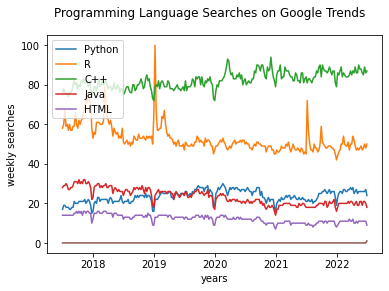

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

#plot data
plt.plot(data)

#add titles
plt.suptitle('Programming Language Searches on Google Trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper left')

plt.show()
plt.savefig('best_language.png')


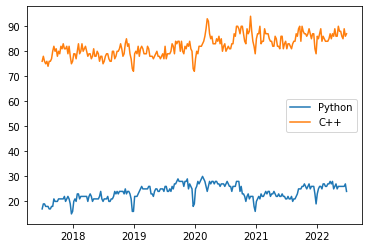

In [15]:
#compain language popularity
focus = ['Python', 'C++'] 

plt.plot(data[focus])
plt.legend(focus)

#### From the graph above, we can see that in 2022, there are more people searching for C++ than Python on Google !

### WHAT ARE THE TOP COUNTRIES SEARCHING FOR PYTHON?

In [16]:
import pandas as pd

#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)  # inc_low_vol=True:includes google trends data for low volume countries/regions as well

#get countries with the highest searches of "Python"
data2 = country_data['Python'].nlargest(10)     # nlargest(10) = the top 10 values (10 rows in the dataframe)

#convert to dataframe
data2 = data2.to_frame()

data2

,Python
geoName,
China,50
Eritrea,38
Israel,36
St. Helena,30
Singapore,25
South Korea,25
Russia,23
Taiwan,22
Hong Kong,21


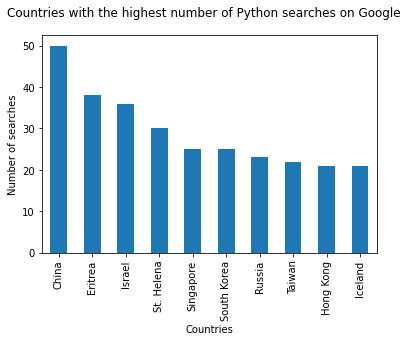

In [17]:
#plot a bar chart
data2.plot(kind='bar', legend=None)

#titles
plt.suptitle('Countries with the highest number of Python searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')

plt.show()

### PLOTTING RESULTS FOR MULTIPLE COUNTRIES

In [18]:
data3 = country_data[55:60]   # 55:60: means, select 5 random countries
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,14,14,50,14,8
Curaçao,7,33,48,6,6
Cyprus,14,22,45,11,8
Czechia,15,23,42,12,8
Côte d’Ivoire,6,16,51,22,5


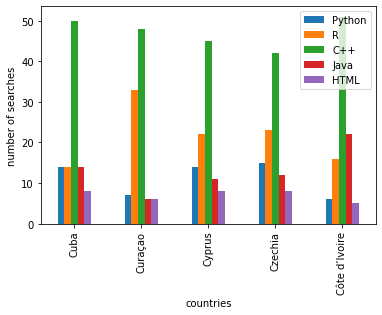

In [19]:
#plot bar chart
data3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()